<a href="https://colab.research.google.com/github/fenzhantw/Dacon_jobcare_recommend/blob/main/feature_engineering/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/job_care/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'sample_submission.csv')
d_code = pd.read_csv(path + '속성_D_코드.csv', index_col=0)
h_code = pd.read_csv(path + '속성_H_코드.csv', index_col=0)
l_code = pd.read_csv(path + '속성_L_코드.csv', index_col=0)

n: 세분류코드 
s: 소분류코드   
m: 중분류코드 
l: 대분류코드


In [3]:
def add_code(df, d_code, h_code, l_code):
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    return df

In [4]:
d_code = d_code.T.to_dict()
h_code = h_code.T.to_dict()
l_code = l_code.T.to_dict()

In [5]:
train = add_code(train, d_code, h_code, l_code)
test = add_code(test, d_code, h_code, l_code)
print("train_data.shape: ", train.shape)
print("test_data.shape: ", test.shape)

train_data.shape:  (501951, 63)
test_data.shape:  (46404, 62)


In [6]:
train = train.drop(['person_prefer_f','person_prefer_g'],axis=1)

In [ ]:
columns = [columns for columns in train.columns.tolist() if columns not in ['target','person_rn','contents_rn','contents_open_dt','contents_open_dt']]
columns

#EDA

In [ ]:
# def show_category_by_target(df, columns):
#     for column in columns:
#         chart = sns.catplot(x=column, col="target", data=df, kind="count")
#         chart.set_xticklabels(rotation=65)
        
# show_category_by_target(train, columns)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

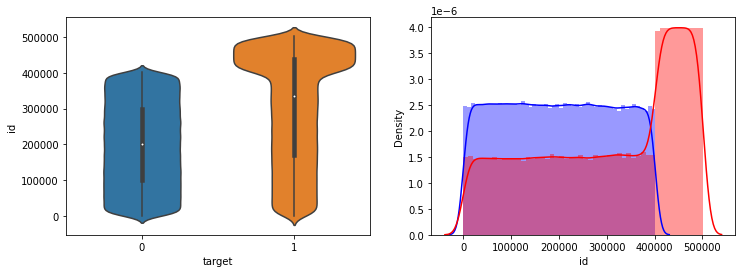

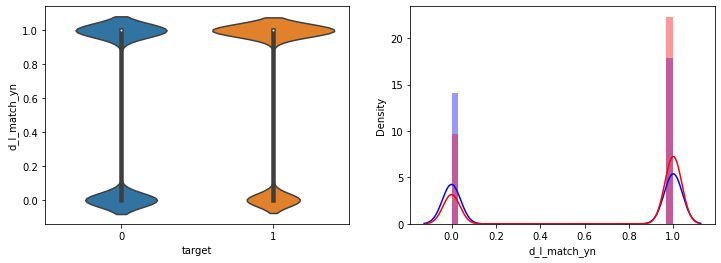

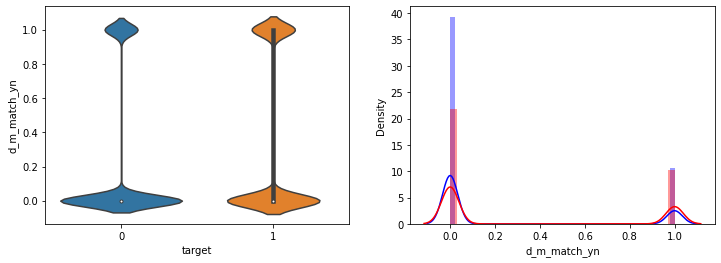

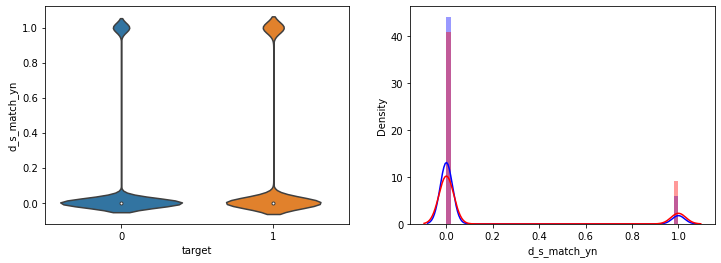

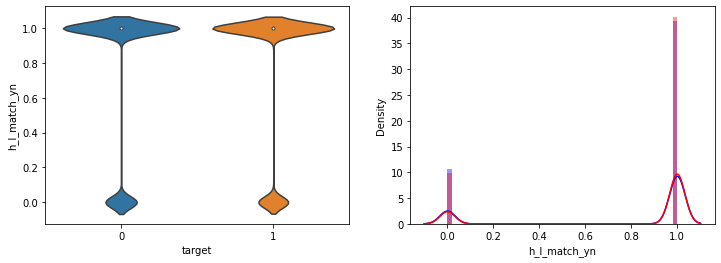

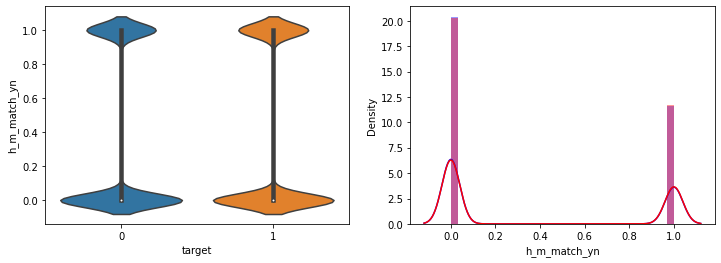

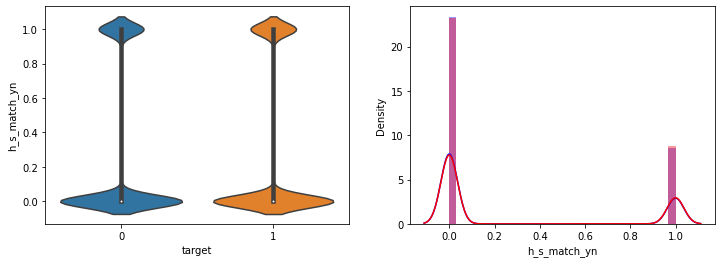

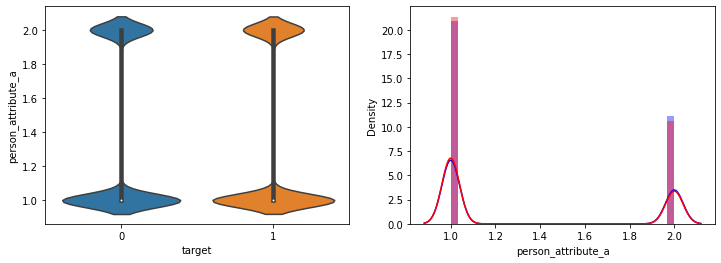

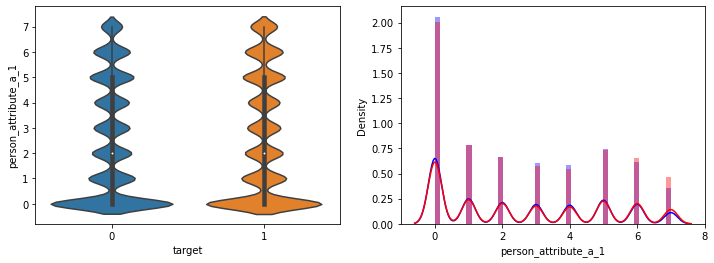

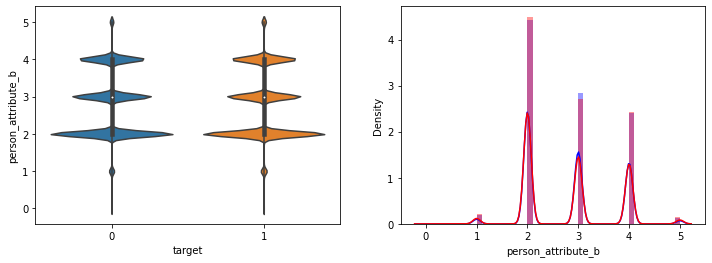

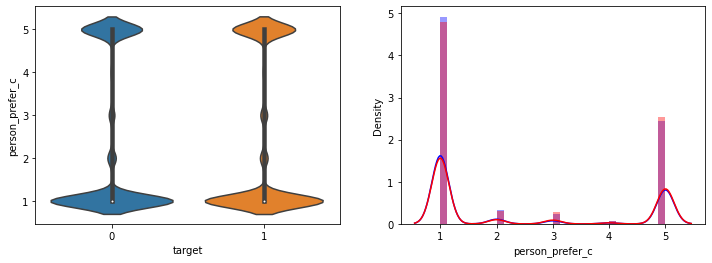

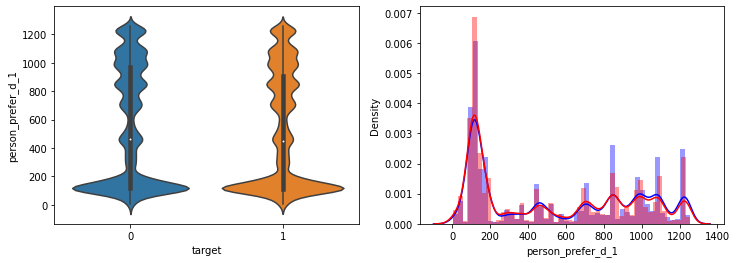

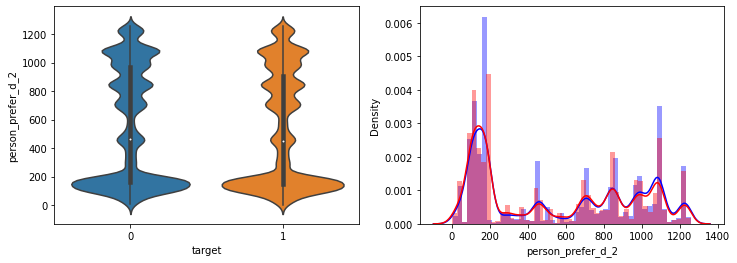

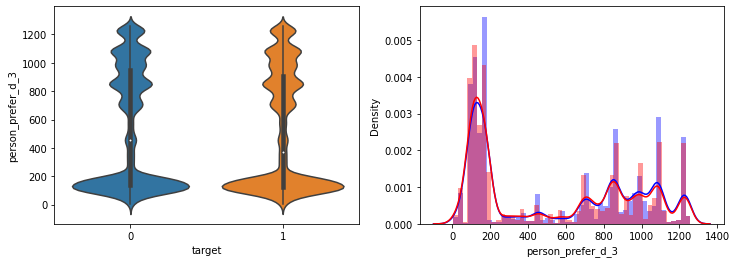

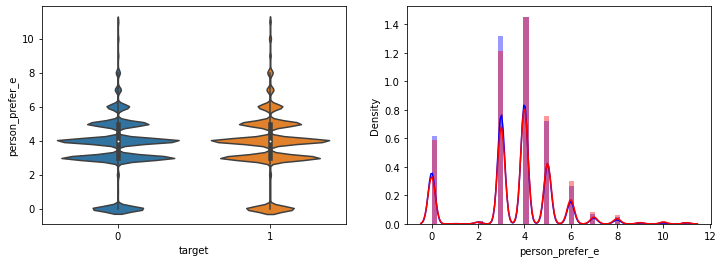

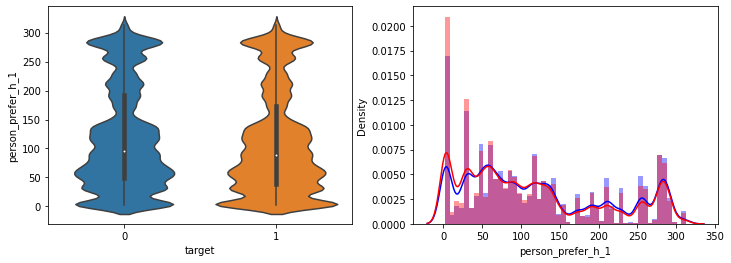

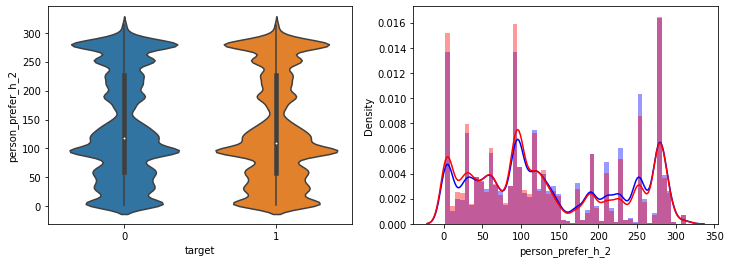

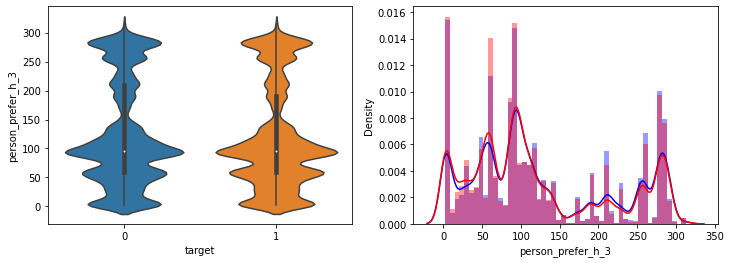

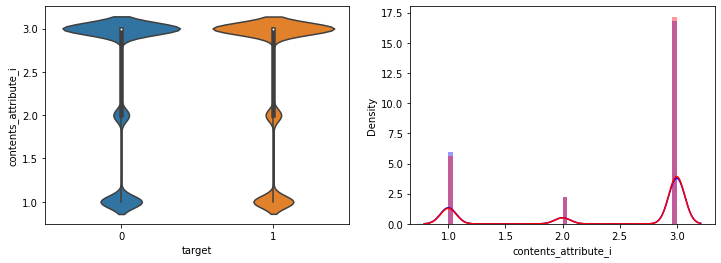

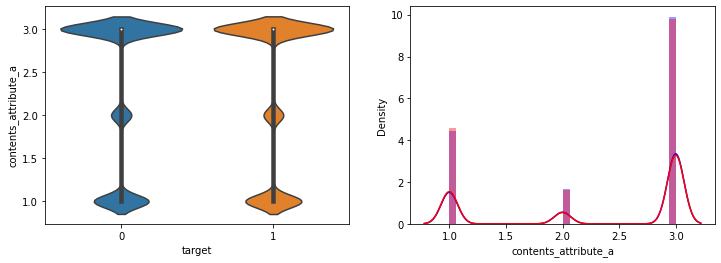

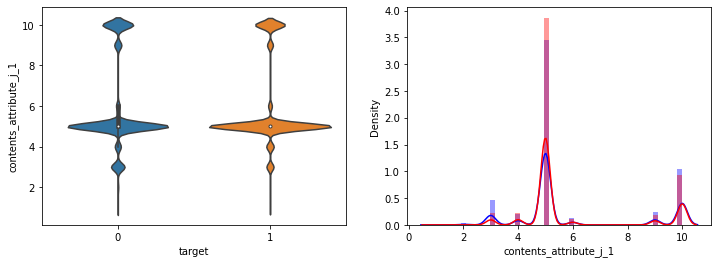

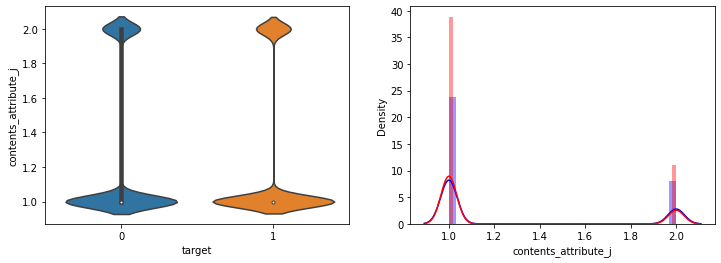

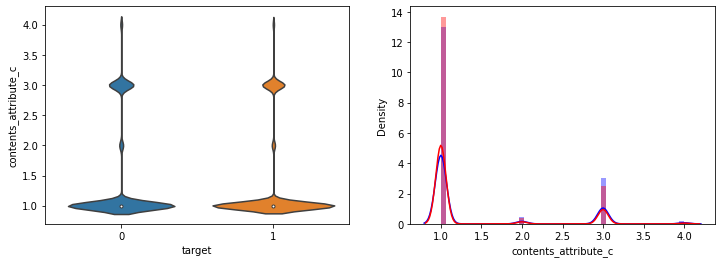

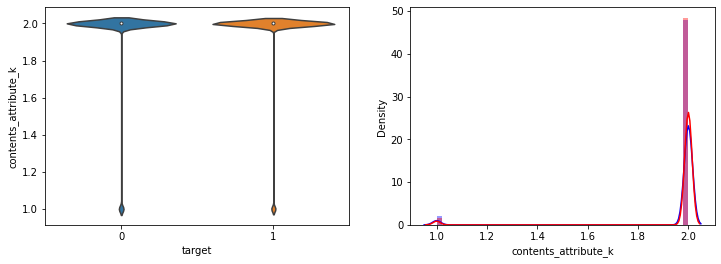

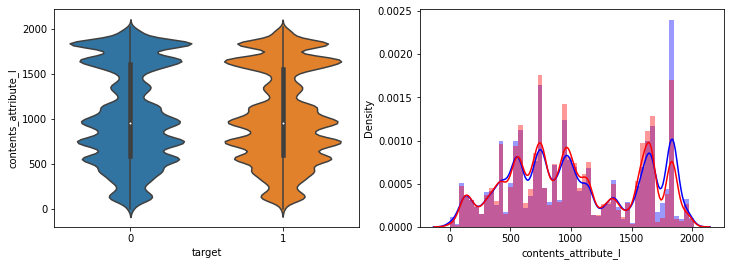

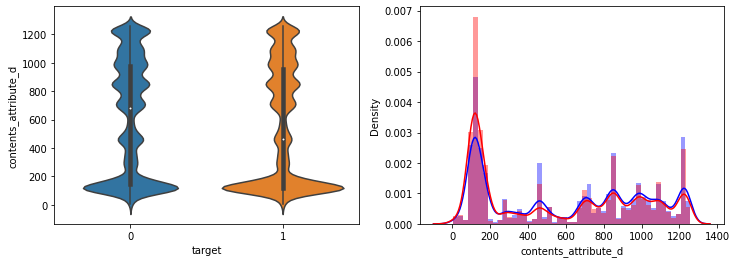

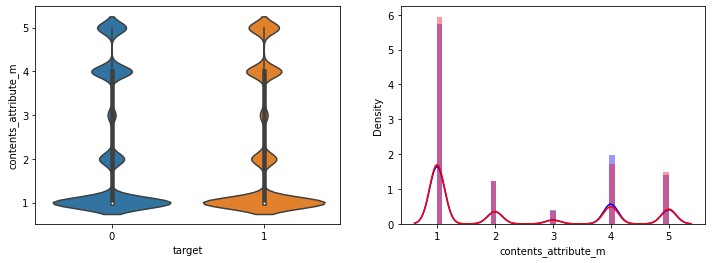

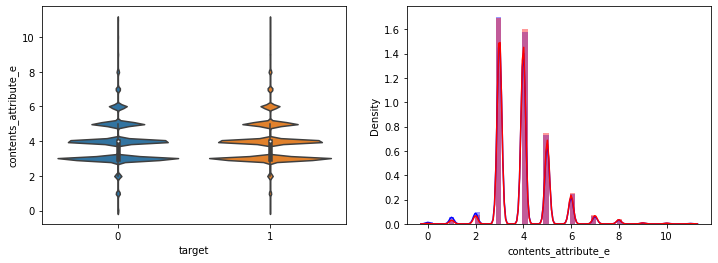

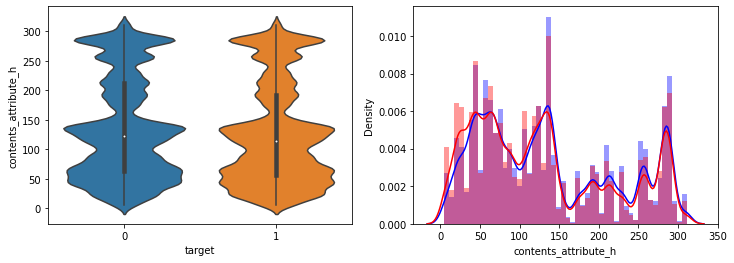

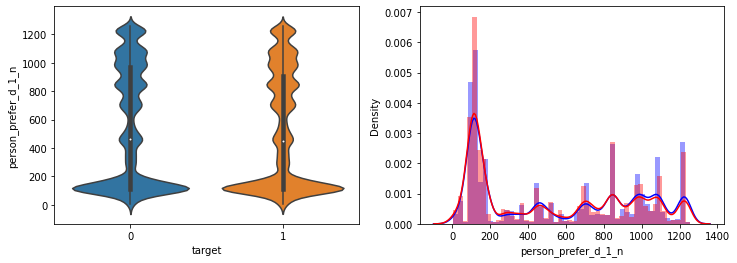

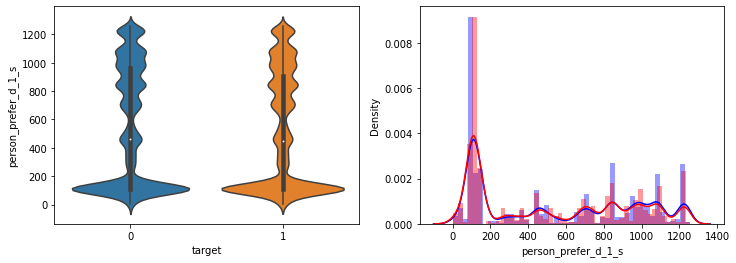

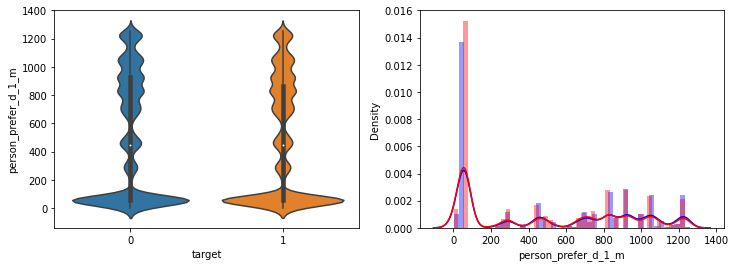

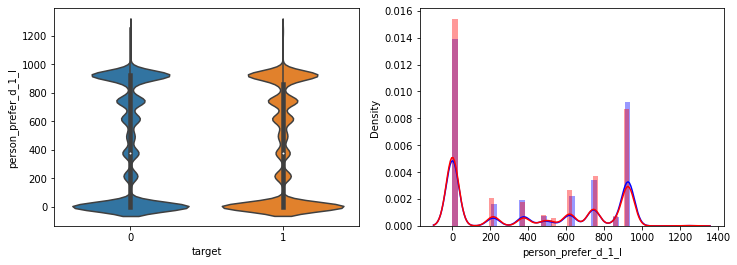

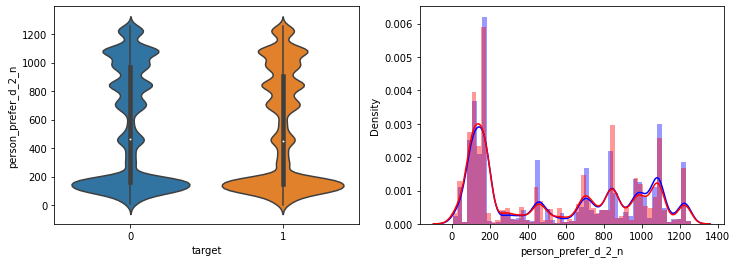

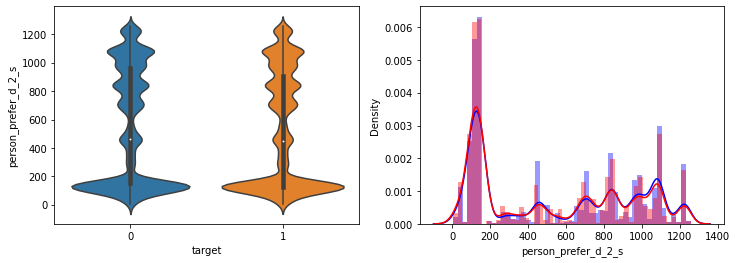

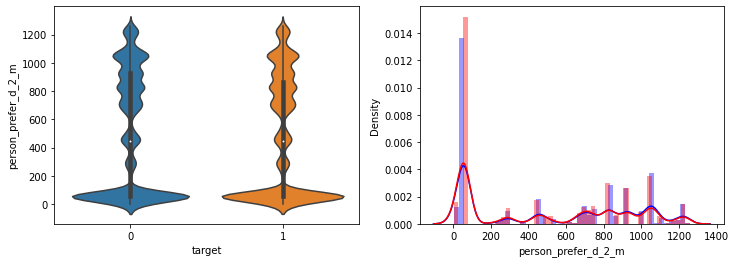

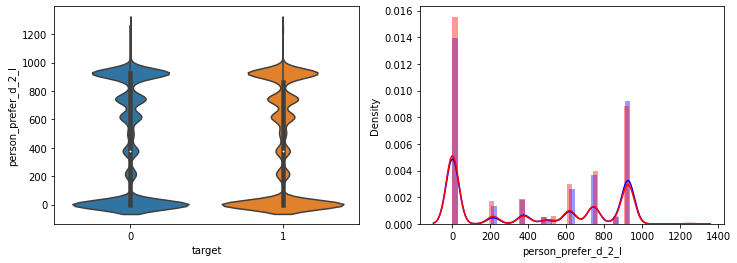

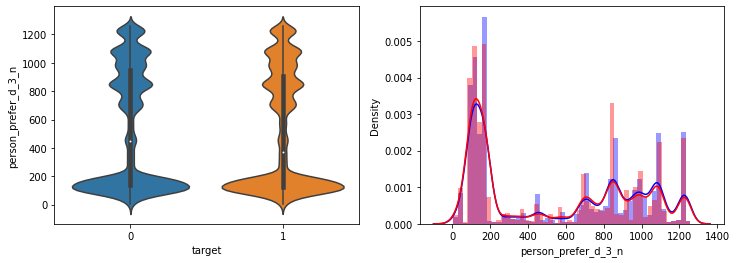

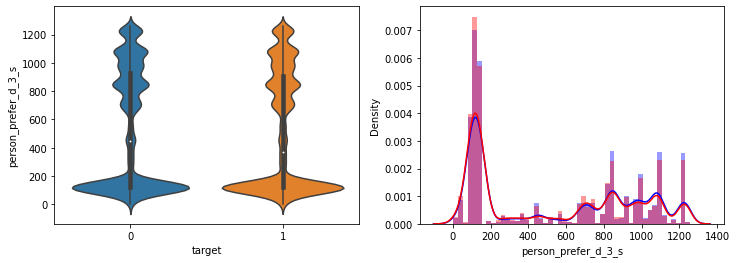

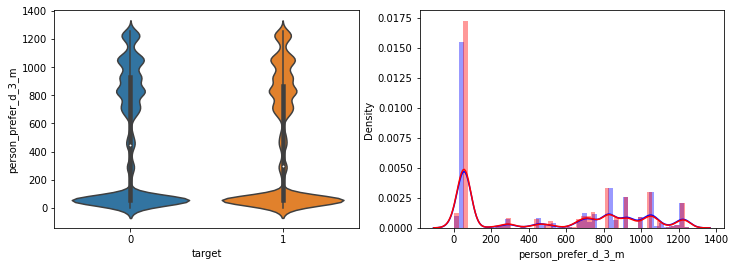

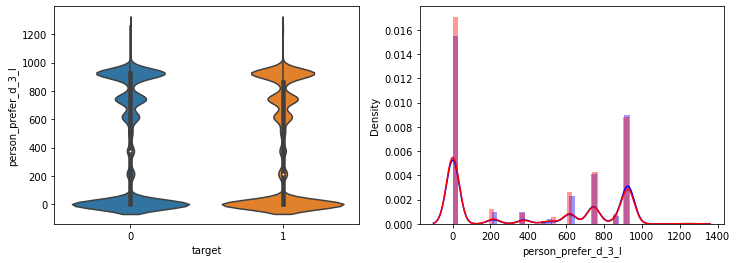

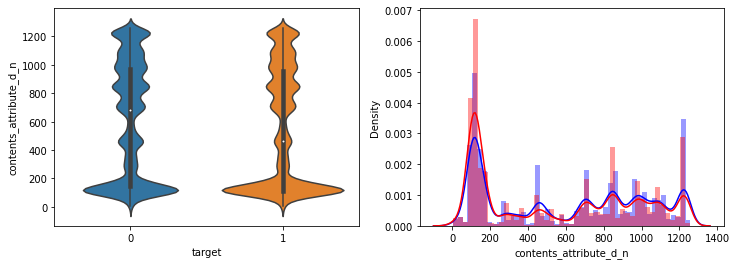

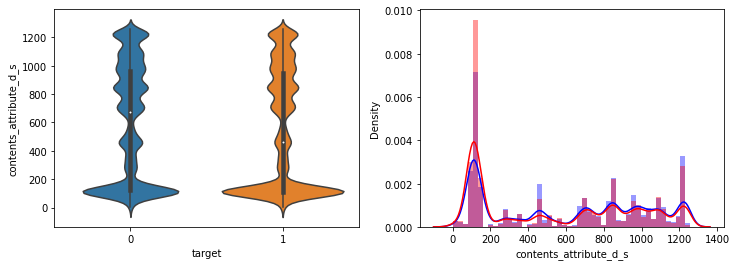

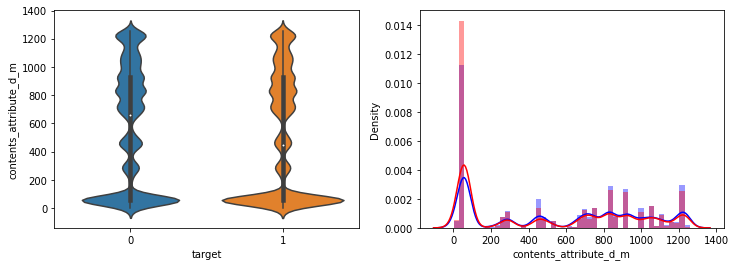

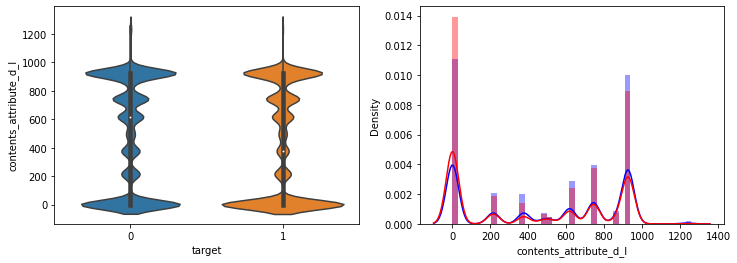

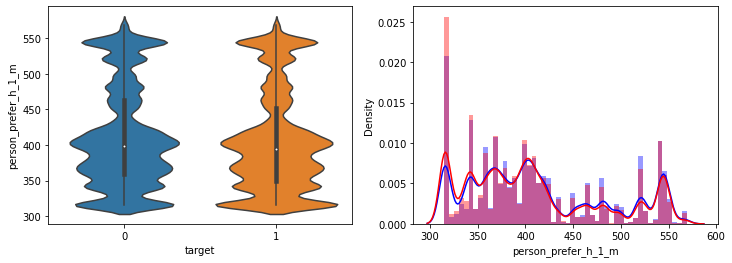

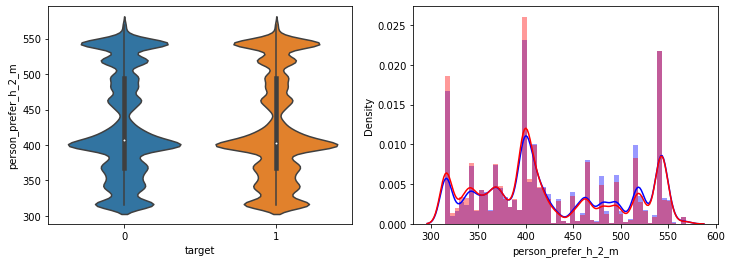

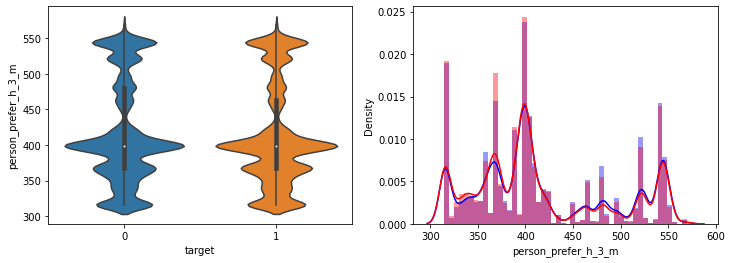

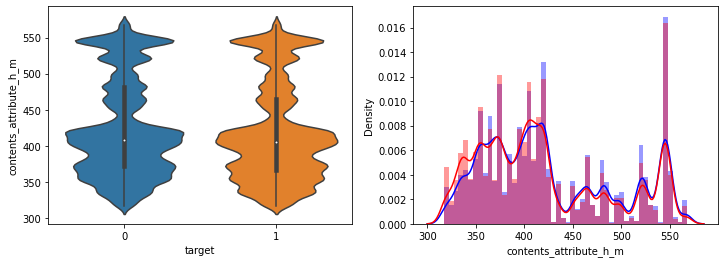

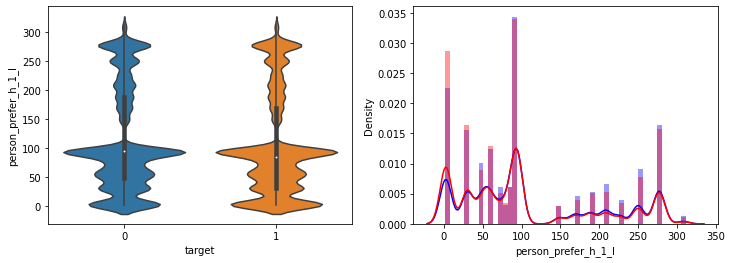

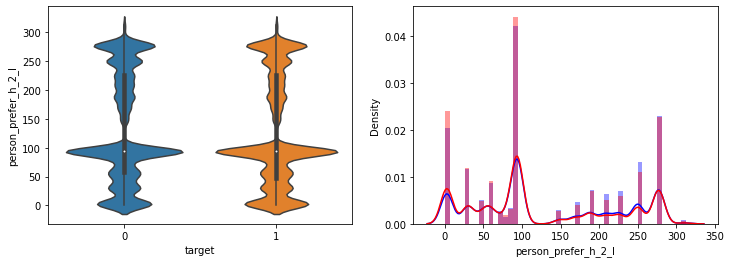

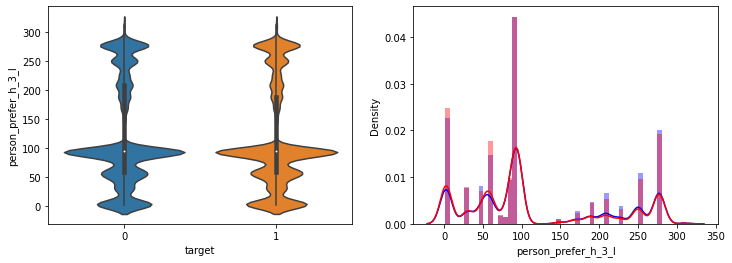

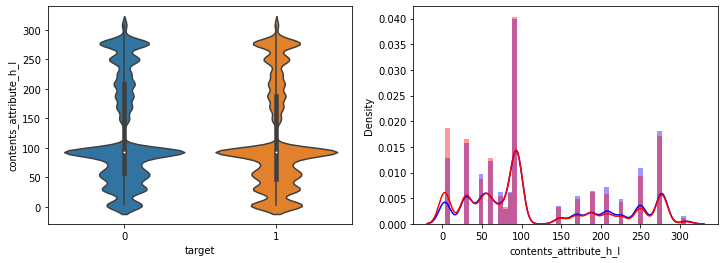

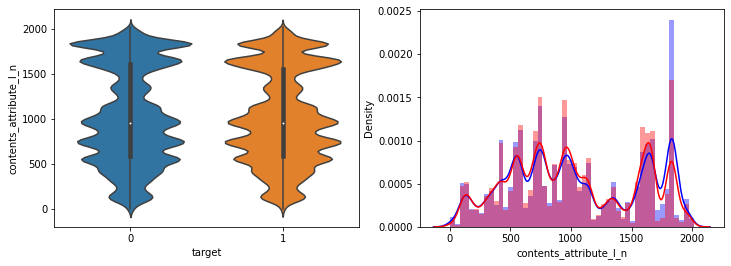

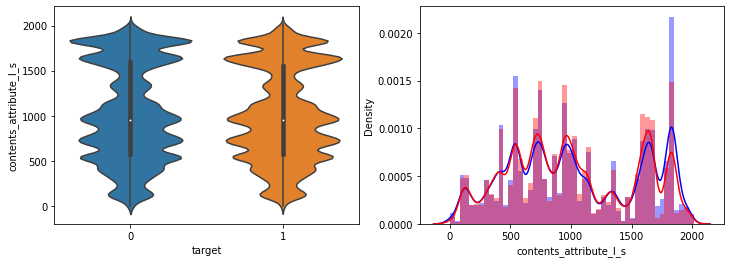

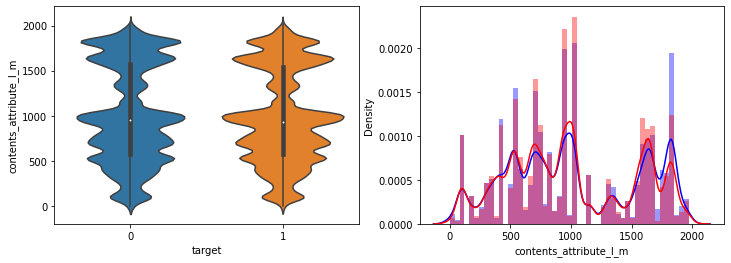

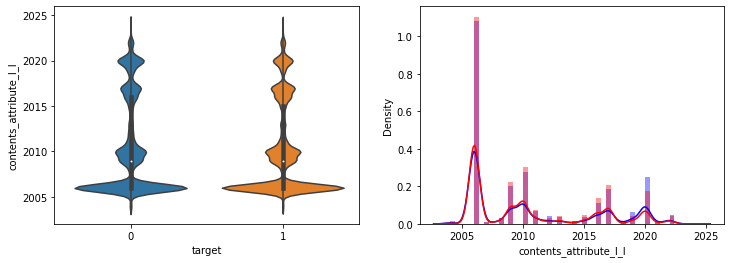

In [10]:
def show_hist_by_target(df,columns):
  cond_1 = (df['target'] == 1)
  cond_0 = (df['target'] == 0)

  for column in columns:
    fix,axs = plt.subplots(nrows=1,ncols=2,figsize = (12, 4),squeeze=False)
    sns.violinplot(x='target',y=column,data=df,ax=axs[0][0])
    sns.distplot(df[cond_0][column],ax=axs[0][1],label='0',color='blue')
    sns.distplot(df[cond_1][column],ax=axs[0][1],label='1',color='red')

show_hist_by_target(train,columns)

red: target(1) blue : target(0)
1. d_s_match_yn,d_m_match_yn이 타겟이 0일때, 0(false)를 가지고 있는 비율이 더 높음
2. person_prefer_d_1,person_prefer_d_2,person_prefer_d_3가 높은 숫자의 카테고리를 가진다면, 타겟이 1인 비율이 조금 높음
3. person_prefer_h_1,person_prefer_h_2가 150 이상 250 아래의 값을 가지면, 타겟이 0인 비율이 조금 높음

# feature engineering

In [ ]:
#범주 개수가 10개 넘는 카테고리 추출
up10_cat = []
columns_names=train.columns.values

for i in columns_names:
  if train[i].value_counts().count() >=10:
     up10_cat.append(i)

#타겟 추가/카테고리 변수 아닌 값 제거
up10_cat.append('target')
up10_cat.remove('id')
up10_cat.remove('person_rn')
up10_cat.remove('contents_rn')
up10_cat.remove('contents_open_dt')



In [ ]:
up10_cat

In [ ]:
train = train[up10_cat]
test  = test[up10_cat[:-1]]
train.head()

,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_l,contents_attribute_d,contents_attribute_e,contents_attribute_h,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_2_m,person_prefer_h_3_m,contents_attribute_h_m,person_prefer_h_1_l,person_prefer_h_2_l,person_prefer_h_3_l,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,target
0,275,370,369,8,4,95,59,1608,275,4,139,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,398,368,422,3,94,58,94,1607,1606,1605,2016,1
1,114,181,175,4,131,101,96,1608,275,4,133,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,400,399,417,94,94,94,94,1607,1606,1605,2016,0
2,464,175,452,3,54,263,56,1600,94,4,53,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,528,366,363,48,250,48,48,1599,1595,1572,2016,0
3,703,705,704,3,72,227,2,1608,275,3,74,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,495,315,381,71,226,1,71,1607,1606,1605,2016,0
4,275,370,369,4,214,210,209,1608,275,4,74,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,481,480,381,208,208,208,71,1607,1606,1605,2016,0


In [ ]:
train_1 = train[train['target']==1]
train_0 = train[train['target']==0]

In [ ]:
# 타겟의 비율 0.5%이상 차이나는 카테고리 구하기
list_diff=[]
for i in up10_cat[:-1]:
  serise=abs((train_1[i].value_counts()/train_1[i].shape[0])*100 - (train_0[i].value_counts()/train_0[i].shape[0])*100)
  temp_list=serise[serise>=0.5].index.tolist()
  list_diff.append(temp_list)

# 0.5차이 나는 값이 1개 이상인 카테고리 딕셔너리로 담기 / 0.5 차이가 나는 변수가 하나인 컬럼은 dict에서 제외
dict1 = {up10_cat[i]:list_diff[i] for i in range(len(up10_cat[:-1])) if len(list_diff[i])>1 }

In [ ]:
# 컬럼 추가
for data in [train,test]:
  for key,values in dict1.items():
    data.loc[:, f"tar_enc_{key}"] = 0
    for i in values:
      con=data[data[key]==i].index
      data.loc[con, f"tar_enc_{key}"] =1



((501951, 79), (46404, 78))

In [ ]:
#값 확인
print(train['tar_enc_person_prefer_d_3_s'].value_counts())
print(train[(train['person_prefer_d_3_s']==123) | (train['person_prefer_d_3_s']==703) | (train['person_prefer_d_3_s']==853) | (train['person_prefer_d_3_s']==1083)].shape)

0    414151
1     87800
Name: tar_enc_person_prefer_d_3_s, dtype: int64
(87800, 79)


In [ ]:
#기존의 0.5이상인 컬럼 값은 들고오고,이하인것만 0으로 된 컬럼 추가
for data in [train,test]:
  for key,values in dict1.items():
    data.loc[:, f"tar_enc_div_{key}"] = 0
    for i in values:
      con=data[data[key]==i].index
      data.loc[con, f"tar_enc_div_{key}"] = i

In [ ]:
# concat and split
data = pd.concat([train,test])

#아래 두개 왜 안될까?
# train = data[data['target']!= np.nan]
# test = data[data['target'] == np.nan]

train = data[data['target'].notnull()]
test = data[data['target'].isnull()]

#테스트 데이터 셋 타겟 제거
test = test.drop(columns=['target'])

train.shape,test.shape